In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

/Users/bohdan/.pyenv/versions/phd-indoor/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
if torch.backends.mps.is_available():
    DEVICE = 'mps'  # macbook
elif torch.cuda.is_available():
    DEVICE = 'cuda'
else:
    DEVICE = 'cpu'

f'using {DEVICE} device'

'using mps device'

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

batch_size = 128

import functools
cifar10 = functools.partial(
    torchvision.datasets.CIFAR10,
    root='./data', download=True, transform=transform,
)
loader = functools.partial(torch.utils.data.DataLoader,
    batch_size=batch_size, shuffle=True, num_workers=2,
)


train_val_data = cifar10(train=True)
train_data, val_data = torch.utils.data.random_split(train_val_data, [0.8, 0.2])
train_loader = loader(train_data)
val_loader = loader(val_data)

test_data = cifar10(train=False)
test_loader = loader(test_data)


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


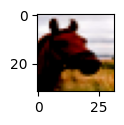

In [4]:
import matplotlib.pyplot as plt

sample_image, _ = test_data[99]
plt.figure(figsize = (1, 1))
plt.imshow(sample_image.permute(1, 2, 0))

single_fixed_noise = torch.randn(1, 100, 1, 1, device=DEVICE)
multi_fixed_noise = torch.randn(64, 100, 1, 1, device=DEVICE)

In [7]:
from models import Autoencoder
from models import VariationalAutoencoder
from models import GAN

EXPERIMENT_NAME = 'ref2-vae-2'

# ae = Autoencoder(EXPERIMENT_NAME, latent_dim=256).to(DEVICE)
ae = VariationalAutoencoder(EXPERIMENT_NAME, latent_dim=256).to(DEVICE)

ae.train_loop((train_loader, val_loader), epochs=100, sample_image=sample_image)

# gan = GAN('ref-gan-2').to(DEVICE)

# gan.train_loop((train_loader, val_loader), epochs=56, 
#                single_noise=single_fixed_noise, multi_noise=multi_fixed_noise)

GAN<ref-gan-2> now uses /Users/bohdan/Edu/ucu/genai/CV/genai_image_generation for resources.
Epoch 36/56


100%|██████████| 313/313 [00:51<00:00,  6.04it/s]


Generator loss: 3.8882990474708543
Discriminator loss: 0.4090566015757692
Epoch 37/56


100%|██████████| 313/313 [00:50<00:00,  6.14it/s]


Generator loss: 3.8414840802978785
Discriminator loss: 0.4455277622936252
Epoch 38/56


100%|██████████| 313/313 [00:50<00:00,  6.14it/s]


Generator loss: 3.8091172884447504
Discriminator loss: 0.5013665847789747
Epoch 39/56


100%|██████████| 313/313 [00:50<00:00,  6.14it/s]


Generator loss: 3.7826468222819196
Discriminator loss: 0.3679332216850485
Epoch 40/56


100%|██████████| 313/313 [00:50<00:00,  6.16it/s]


Generator loss: 3.782730224795235
Discriminator loss: 0.3783601313924637
Epoch 41/56


100%|██████████| 313/313 [00:50<00:00,  6.15it/s]


Generator loss: 3.780300705863264
Discriminator loss: 0.45227576877933723
Epoch 42/56


100%|██████████| 313/313 [00:50<00:00,  6.14it/s]


Generator loss: 3.6552340986427314
Discriminator loss: 0.4818029341796717
Epoch 43/56


100%|██████████| 313/313 [00:50<00:00,  6.14it/s]


Generator loss: 3.9029027526371016
Discriminator loss: 0.4616768860731262
Epoch 44/56


100%|██████████| 313/313 [00:50<00:00,  6.16it/s]


Generator loss: 3.6523642081041308
Discriminator loss: 0.41009578932398044
Epoch 45/56


100%|██████████| 313/313 [00:50<00:00,  6.15it/s]


Generator loss: 3.7011886413533466
Discriminator loss: 0.4460064593119362
Epoch 46/56


100%|██████████| 313/313 [00:51<00:00,  6.08it/s]


Generator loss: 3.748295134867723
Discriminator loss: 0.4048410345333072
Epoch 47/56


100%|██████████| 313/313 [00:51<00:00,  6.13it/s]


Generator loss: 3.9265567724125834
Discriminator loss: 0.3583946781941115
Epoch 48/56


100%|██████████| 313/313 [00:50<00:00,  6.16it/s]


Generator loss: 3.9274020752967735
Discriminator loss: 0.39231239380642247
Epoch 49/56


100%|██████████| 313/313 [00:50<00:00,  6.14it/s]


Generator loss: 3.75958354233172
Discriminator loss: 0.4485695360186763
Epoch 50/56


100%|██████████| 313/313 [00:50<00:00,  6.17it/s]


Generator loss: 3.8043660162546384
Discriminator loss: 0.3835777637248222
Epoch 51/56


100%|██████████| 313/313 [00:51<00:00,  6.06it/s]


Generator loss: 3.8111901341583403
Discriminator loss: 0.39775001200528953
Epoch 52/56


100%|██████████| 313/313 [00:50<00:00,  6.15it/s]


Generator loss: 3.704383961963482
Discriminator loss: 0.46598399023468884
Epoch 53/56


100%|██████████| 313/313 [00:50<00:00,  6.14it/s]


Generator loss: 3.733628928423309
Discriminator loss: 0.3721508637261086
Epoch 54/56


100%|██████████| 313/313 [00:50<00:00,  6.15it/s]


Generator loss: 3.847170547269785
Discriminator loss: 0.36297179772831
Epoch 55/56


100%|██████████| 313/313 [00:50<00:00,  6.17it/s]


Generator loss: 3.9897166567202955
Discriminator loss: 0.4038319451311907
Epoch 56/56


100%|██████████| 313/313 [00:51<00:00,  6.09it/s]

Generator loss: 3.965169867149557
Discriminator loss: 0.37393753994672824


100%|██████████| 313/313 [00:20<00:00, 15.11it/s]


Train loss: 0.1636095872511879


100%|██████████| 79/79 [00:14<00:00,  5.52it/s]


Validation loss: 0.16329858584117285
Epoch  62/100


100%|██████████| 313/313 [00:19<00:00, 16.07it/s]


Train loss: 0.16335965907230926


100%|██████████| 79/79 [00:14<00:00,  5.58it/s]


Validation loss: 0.16336967390549334
Epoch  63/100


100%|██████████| 313/313 [00:19<00:00, 15.92it/s]


Train loss: 0.16319011704038128


100%|██████████| 79/79 [00:14<00:00,  5.57it/s]


Validation loss: 0.16302781165400637
Epoch  64/100


100%|██████████| 313/313 [00:20<00:00, 15.62it/s]


Train loss: 0.16298489310680486


100%|██████████| 79/79 [00:14<00:00,  5.64it/s]


Validation loss: 0.16294073860479308
Epoch  65/100


100%|██████████| 313/313 [00:19<00:00, 16.01it/s]


Train loss: 0.16277707089631321


100%|██████████| 79/79 [00:14<00:00,  5.57it/s]


Validation loss: 0.16315451773661602
Epoch  66/100


100%|██████████| 313/313 [00:20<00:00, 15.53it/s]


Train loss: 0.16261955138783865


100%|██████████| 79/79 [00:14<00:00,  5.45it/s]


Validation loss: 0.16247868019191525
Epoch  67/100


100%|██████████| 313/313 [00:19<00:00, 15.67it/s]


Train loss: 0.1624427209742153


100%|██████████| 79/79 [00:14<00:00,  5.62it/s]


Validation loss: 0.16249194194244432
Epoch  68/100


100%|██████████| 313/313 [00:19<00:00, 15.89it/s]


Train loss: 0.16231879015890555


100%|██████████| 79/79 [00:14<00:00,  5.60it/s]


Validation loss: 0.162527512900437
Epoch  69/100


100%|██████████| 313/313 [00:20<00:00, 15.54it/s]


Train loss: 0.16219465663067448


100%|██████████| 79/79 [00:14<00:00,  5.47it/s]


Validation loss: 0.1627644815399677
Epoch  70/100


100%|██████████| 313/313 [00:19<00:00, 16.06it/s]


Train loss: 0.16200846947800998


100%|██████████| 79/79 [00:14<00:00,  5.64it/s]


Validation loss: 0.162663940953303
Epoch  71/100


100%|██████████| 313/313 [00:19<00:00, 16.05it/s]


Train loss: 0.16186085019629604


100%|██████████| 79/79 [00:14<00:00,  5.30it/s]


Validation loss: 0.16224713548074796
Epoch  72/100


100%|██████████| 313/313 [00:20<00:00, 15.26it/s]


Train loss: 0.1617544558577644


100%|██████████| 79/79 [00:14<00:00,  5.59it/s]


Validation loss: 0.16158283454707906
Epoch  73/100


100%|██████████| 313/313 [00:20<00:00, 15.32it/s]


Train loss: 0.16164034452682105


100%|██████████| 79/79 [00:14<00:00,  5.56it/s]


Validation loss: 0.16188336022292513
Epoch  74/100


100%|██████████| 313/313 [00:19<00:00, 15.79it/s]


Train loss: 0.16150193625745682


100%|██████████| 79/79 [00:14<00:00,  5.62it/s]


Validation loss: 0.1617450661297086
Epoch  75/100


100%|██████████| 313/313 [00:20<00:00, 15.16it/s]


Train loss: 0.16130972846437946


100%|██████████| 79/79 [00:14<00:00,  5.60it/s]


Validation loss: 0.1617992650481719
Epoch  76/100


100%|██████████| 313/313 [00:23<00:00, 13.37it/s]


Train loss: 0.16124258911647735


100%|██████████| 79/79 [00:14<00:00,  5.30it/s]


Validation loss: 0.16201405906224553
Epoch  77/100


100%|██████████| 313/313 [00:21<00:00, 14.84it/s]


Train loss: 0.16110712651627512


100%|██████████| 79/79 [00:15<00:00,  5.13it/s]


Validation loss: 0.16161987657033944
Epoch  78/100


100%|██████████| 313/313 [00:21<00:00, 14.71it/s]


Train loss: 0.1610123567021312


100%|██████████| 79/79 [00:14<00:00,  5.43it/s]


Validation loss: 0.16108168114589738
Epoch  79/100


100%|██████████| 313/313 [00:22<00:00, 14.20it/s]


Train loss: 0.16084878427532914


100%|██████████| 79/79 [00:14<00:00,  5.43it/s]


Validation loss: 0.1612757206717624
Epoch  80/100


100%|██████████| 313/313 [00:21<00:00, 14.61it/s]


Train loss: 0.16071423421652553


100%|██████████| 79/79 [00:14<00:00,  5.43it/s]


Validation loss: 0.16076840960149524
Epoch  81/100


100%|██████████| 313/313 [00:20<00:00, 15.02it/s]


Train loss: 0.1607007359544309


100%|██████████| 79/79 [00:15<00:00,  5.23it/s]


Validation loss: 0.1608889749910258
Epoch  82/100


100%|██████████| 313/313 [00:20<00:00, 15.05it/s]


Train loss: 0.16055277608834898


100%|██████████| 79/79 [00:14<00:00,  5.46it/s]


Validation loss: 0.16081239792365062
Epoch  83/100


100%|██████████| 313/313 [00:20<00:00, 14.99it/s]


Train loss: 0.16043682139331158


100%|██████████| 79/79 [00:14<00:00,  5.31it/s]


Validation loss: 0.16078678942933866
Epoch  84/100


100%|██████████| 313/313 [00:22<00:00, 13.78it/s]


Train loss: 0.160332269895191


100%|██████████| 79/79 [00:14<00:00,  5.35it/s]


Validation loss: 0.16081696824182437
Epoch  85/100


100%|██████████| 313/313 [00:19<00:00, 15.69it/s]


Train loss: 0.1602597816017108


100%|██████████| 79/79 [00:14<00:00,  5.62it/s]


Validation loss: 0.16103259351434587
Epoch  86/100


100%|██████████| 313/313 [00:19<00:00, 15.87it/s]


Train loss: 0.1601886472667749


100%|██████████| 79/79 [00:14<00:00,  5.45it/s]


Validation loss: 0.16062159213838698
Epoch  87/100


100%|██████████| 313/313 [00:20<00:00, 15.64it/s]


Train loss: 0.1600167295708062


100%|██████████| 79/79 [00:14<00:00,  5.60it/s]


Validation loss: 0.16029475799089746
Epoch  88/100


100%|██████████| 313/313 [00:19<00:00, 15.83it/s]


Train loss: 0.15999201977976596


100%|██████████| 79/79 [00:14<00:00,  5.28it/s]


Validation loss: 0.1603240731019008
Epoch  89/100


100%|██████████| 313/313 [00:19<00:00, 15.75it/s]


Train loss: 0.15989534452129095


100%|██████████| 79/79 [00:14<00:00,  5.39it/s]


Validation loss: 0.16011296042913123
Epoch  90/100


100%|██████████| 313/313 [00:20<00:00, 15.64it/s]


Train loss: 0.1597682306179985


100%|██████████| 79/79 [00:14<00:00,  5.56it/s]


Validation loss: 0.16091956764082366
Epoch  91/100


100%|██████████| 313/313 [00:19<00:00, 15.77it/s]


Train loss: 0.15968549165862816


100%|██████████| 79/79 [00:16<00:00,  4.80it/s]


Validation loss: 0.1599904144112068
Epoch  92/100


100%|██████████| 313/313 [00:21<00:00, 14.86it/s]


Train loss: 0.15961055986035746


100%|██████████| 79/79 [00:14<00:00,  5.58it/s]


Validation loss: 0.159715744136255
Epoch  93/100


100%|██████████| 313/313 [00:20<00:00, 15.46it/s]


Train loss: 0.1595670589909386


100%|██████████| 79/79 [00:15<00:00,  5.26it/s]


Validation loss: 0.15980798156955575
Epoch  94/100


  0%|          | 0/313 [00:02<?, ?it/s]


KeyboardInterrupt: 